In [1]:
# pip install natsort

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from natsort import natsort_keygen, ns
# import torch
# import torchvision
# from torchvision import transforms
# from torch.utils.data import Dataset
# # import matplotlib.pyplot as plt
# from torch import nn
# import torch.nn.functional as F
# from torch import optim
# from skimage import io, transform

Using TensorFlow backend.


In [3]:
natsort_key1 = natsort_keygen(key=lambda y: y.lower())

In [3]:
imagelist=[]
for filename in os.listdir('test'):
    imagelist.append(filename)
imagelist.sort(key=natsort_key1)
loaded_images=list()
for filename in imagelist:
    img_data=image.imread('test/'+filename)
    loaded_images.append(img_data)
x_test=np.asarray(loaded_images)
# np.savetxt("test.csv",a,delimiter=",")
# x_test=((x_test*100.0)/255.0)

KeyboardInterrupt: 

In [4]:
imagelist2=[]
for filename in os.listdir('train'):
    imagelist2.append(filename)
imagelist2.sort(key=natsort_key1)
loaded_images2=list()
# checklist=[]
for filename in imagelist2:
    img_data=image.imread('train/'+filename)
#     checklist.append(filename)
    loaded_images2.append(img_data)

In [6]:
# pd.DataFrame(loaded_images2).to_csv("train.csv")

ValueError: Must pass 2-d input

In [7]:
data=pd.read_csv('trainLabels.csv')
# data.head
# print(data)
data['key']=data['label'].map({'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9})

In [8]:
x_train=np.asarray(loaded_images2)
y_train=data.iloc[:,2:].values
# print(y_train)
type(y_train)
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [25]:
y_train[0:15]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
# (x_train,y_train),(x_test,y_test)=cifar10.load_data()
# x_train.shape,y_train.shape,x_test.shape,y_test.shape


[9]
Shape of x_samp = (32, 32, 3)


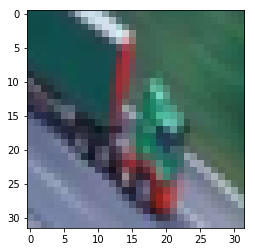

In [10]:
x_samp, y_samp = x_train[50], y_train[50]
print(y_samp)
print ("Shape of x_samp =", x_samp.shape)
plt.imshow(x_samp)
plt.show()

In [11]:
EPOCHS = 4
NUM_CLASSES=10

In [12]:
x_train=x_train.reshape(x_train.shape[0],32,32,3).astype('float32')
# x_test=x_test.reshape(x_test.shape[0],32,32,3).astype('float32')

In [13]:
# x_train=((x_train*100.0))
# x_test/=255.0
print(x_train[0])
# print("ssssssssssssssssssssssssssssssssssss")
# print(loaded_images2[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [14]:
y_train=np_utils.to_categorical(y_train)
# y_test=np_utils.to_categorical(y_test)

In [15]:
model=Sequential()

model.add(Conv2D(32,(5,5),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





In [16]:
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=40)
hist = model.fit(x_train, y_train, batch_size=40, epochs=EPOCHS,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/4
 - 146s - loss: 1.5786 - acc: 0.4239
Epoch 2/4
 - 147s - loss: 1.2129 - acc: 0.5668
Epoch 3/4
 - 158s - loss: 1.0527 - acc: 0.6284
Epoch 4/4
 - 181s - loss: 0.9492 - acc: 0.6661


In [18]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [19]:
imagelist=[]
for filename in os.listdir('test'):
    imagelist.append(filename)
imagelist.sort(key=natsort_key1)
loaded_images=list()
for filename in imagelist:
    img_data=image.imread('test/'+filename)
    loaded_images.append(img_data)
x_test=np.asarray(loaded_images)
# np.savetxt("test.csv",a,delimiter=",")
# x_test=((x_test*100.0)/255.0)

In [20]:

y_pred=model.predict_classes(x_test)
print(y_pred[15])
# print(y_pred)

8


In [21]:
print(y_pred[0:15])


[4 0 9 8 4 3 2 3 3 3 2 3 3 3 3]


In [22]:
mapping={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}


In [26]:
sub=pd.DataFrame({'id':range(1,len(y_pred)+1),'key':y_pred})

In [27]:
sub.head()

,id,key
0,1,4
1,2,0
2,3,9
3,4,8
4,5,4


In [28]:
sub['label']=sub['key'].map({0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'})

In [29]:
sub.head()

,id,key,label
0,1,4,deer
1,2,0,airplane
2,3,9,truck
3,4,8,ship
4,5,4,deer


In [30]:
sub.drop(['key'],axis=1,inplace=True)

In [31]:
sub.to_csv('file1.csv')